### 1. Считаем данные

In [1]:
import pandas as pd
import numpy as np

In [2]:
adverts = pd.read_csv('advert_train.csv')
sales = pd.read_csv('sales_train.csv')

In [3]:
adverts_test = pd.read_csv('advert_test.csv')
example = pd.read_csv('deploy_example.csv')

In [4]:
adverts.head()

,date,market_1,market_2,market_3,market_4,market_5,market_6,market_7,market_8
0,2008-01-02,0,0,0,0,0,0,0,0
1,2008-01-03,0,0,0,0,0,0,0,0
2,2008-01-04,0,0,0,0,0,0,0,0
3,2008-01-05,0,0,0,0,0,0,0,0
4,2008-01-06,0,0,0,0,0,0,0,0


In [5]:
adverts.head()

,date,market_1,market_2,market_3,market_4,market_5,market_6,market_7,market_8
0,2008-01-02,0,0,0,0,0,0,0,0
1,2008-01-03,0,0,0,0,0,0,0,0
2,2008-01-04,0,0,0,0,0,0,0,0
3,2008-01-05,0,0,0,0,0,0,0,0
4,2008-01-06,0,0,0,0,0,0,0,0


In [6]:
adverts[(adverts.select_dtypes(include=['number']) != 0).any(1)]

,date,market_1,market_2,market_3,market_4,market_5,market_6,market_7,market_8
32,2008-02-03,0,0,0,0,0,0,0,1
333,2008-11-30,0,0,0,0,0,0,1,0
342,2008-12-09,0,0,1,0,0,0,0,0
378,2009-01-14,0,0,0,0,0,0,0,1
432,2009-03-09,0,0,0,0,0,0,0,1
434,2009-03-11,0,0,0,0,0,0,1,0
449,2009-03-26,0,0,0,0,0,0,1,0
675,2009-11-07,1,0,0,0,0,0,0,0
685,2009-11-17,0,0,0,0,1,0,0,0
688,2009-11-20,0,0,1,0,0,0,0,0


In [7]:
print(len(adverts[(adverts.select_dtypes(include=['number']) != 0).any(1)]))
print(len(adverts))

45
2921


In [8]:
sales.head()

,date,market_1,market_2,market_3,market_4,market_5,market_6,market_7,market_8
0,2008-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2008-01-03,NaN,1.006943,1.002595,1.006953,1.014819,NaN,1.008989,1.003241
2,2008-01-04,1.015188,NaN,1.043535,1.044507,1.050865,1.025508,1.037337,1.024117
3,2008-01-05,NaN,1.045076,NaN,1.080214,1.071665,NaN,NaN,1.028124
4,2008-01-06,0.995762,1.000988,1.051633,1.056388,1.047756,1.002896,1.027538,0.990433


In [9]:
len(sales)

2921

### 2. Посмотрим более подробно на данные

##### Посмотрим на глаз, есть ли долгосрочные изменения продаж от реклам

In [10]:
import matplotlib.pyplot as plt

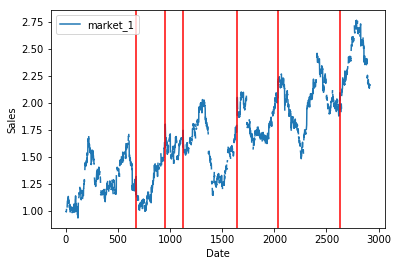

In [11]:
adlist_1 = list(adverts[adverts['market_1'] != 0].index)

plt.plot(sales['market_1'])
for ad in adlist_1:
    plt.axvline(x=ad, c='r')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

##### Посмотрим на периодичность в год

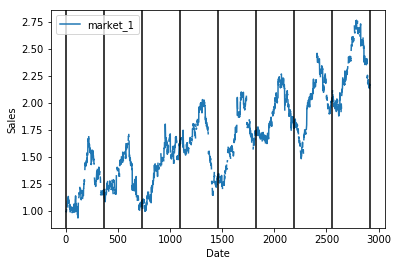

In [12]:
plt.plot(sales['market_1'])
for i in range(9):
    plt.axvline(x=i * 365, c='k')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [13]:
adlist_2 = list(adverts[adverts['market_2'] != 0].index)

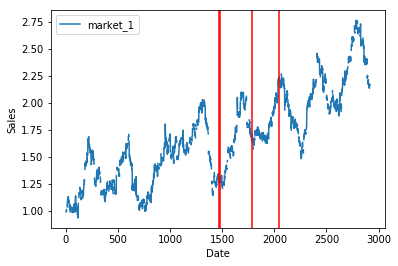

In [14]:
plt.plot(sales['market_1'])
for ad in adlist_2:
    plt.axvline(x=ad, c='r')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

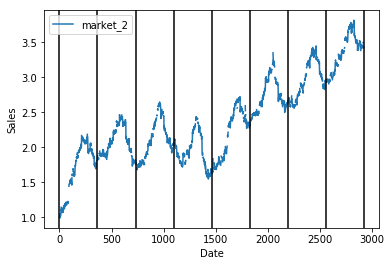

In [15]:
plt.plot(sales['market_2'])
for i in range(9):
    plt.axvline(x=i * 365, c='k')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

##### По первому взгляду, у данных есть сезонность длиною в год

In [16]:
sales.describe()

,market_1,market_2,market_3,market_4,market_5,market_6,market_7,market_8
count,2318.000000,2320.000000,2355.000000,2320.000000,2347.000000,2301.000000,2348.000000,2370.000000
mean,1.679924,2.382302,1.785479,2.084432,2.351293,2.310386,1.788906,2.545632
std,0.415762,0.603411,0.435667,0.924918,0.829402,0.898197,0.742181,0.924786
min,0.937147,0.989628,0.951383,0.862978,1.000000,0.856543,0.558537,0.894445
25%,1.339669,1.905707,1.465732,1.319057,1.634398,1.504911,1.202137,1.840781
50%,1.656322,2.316259,1.706630,1.844848,2.120974,2.196724,1.625944,2.409829
75%,1.977632,2.817650,2.028506,2.453868,2.994378,3.130042,2.349546,3.040654
max,2.766316,3.814635,3.037881,4.272993,4.394967,4.114637,3.446461,4.746889


In [17]:
sales.isna().sum()

date          0
market_1    603
market_2    601
market_3    566
market_4    601
market_5    574
market_6    620
market_7    573
market_8    551
dtype: int64

##### Уберем NA значения

In [18]:
sales.fillna(method='ffill', inplace=True)

C:\Users\777\Anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3D782CA58>,
      dtype=object)

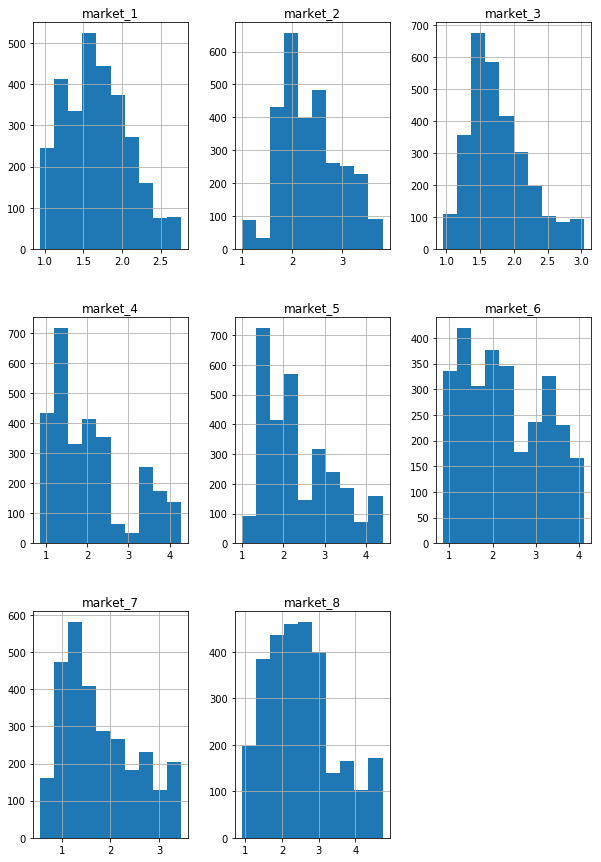

In [19]:
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
sales.hist(ax = ax)

### 3. Анализ влияния рекламы

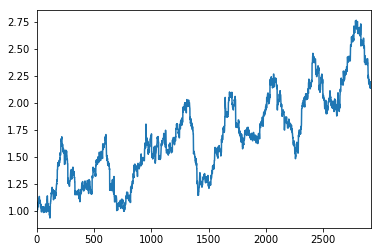

In [20]:
sales['market_1'].plot()


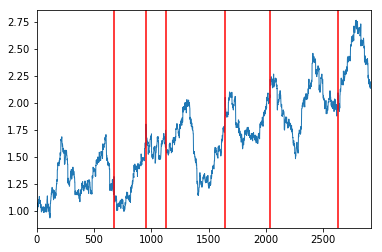

In [21]:
sales['market_1'].plot(linewidth=1)
for ad in adlist_1:
    plt.axvline(x=ad, c='r')

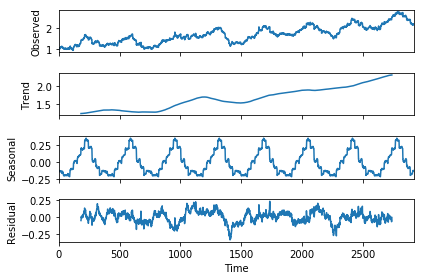

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = sales['market_1'].values
result = seasonal_decompose(series, model='additive', freq=365)
result.plot()
plt.show()

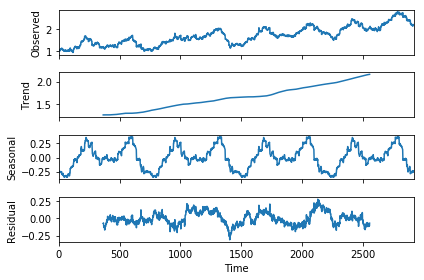

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = sales['market_1'].values
result = seasonal_decompose(series, model='additive', freq=730)
result.plot()
plt.show()

##### тренд более прямой при периодичности в два года

In [24]:
adlist = [list(adverts[adverts['market_' + str(i)] != 0].index) for i in range(1, 9)]

#####  Посмотрим на влияние рекламы на продажи в ближайшие плюс минус 30 дней

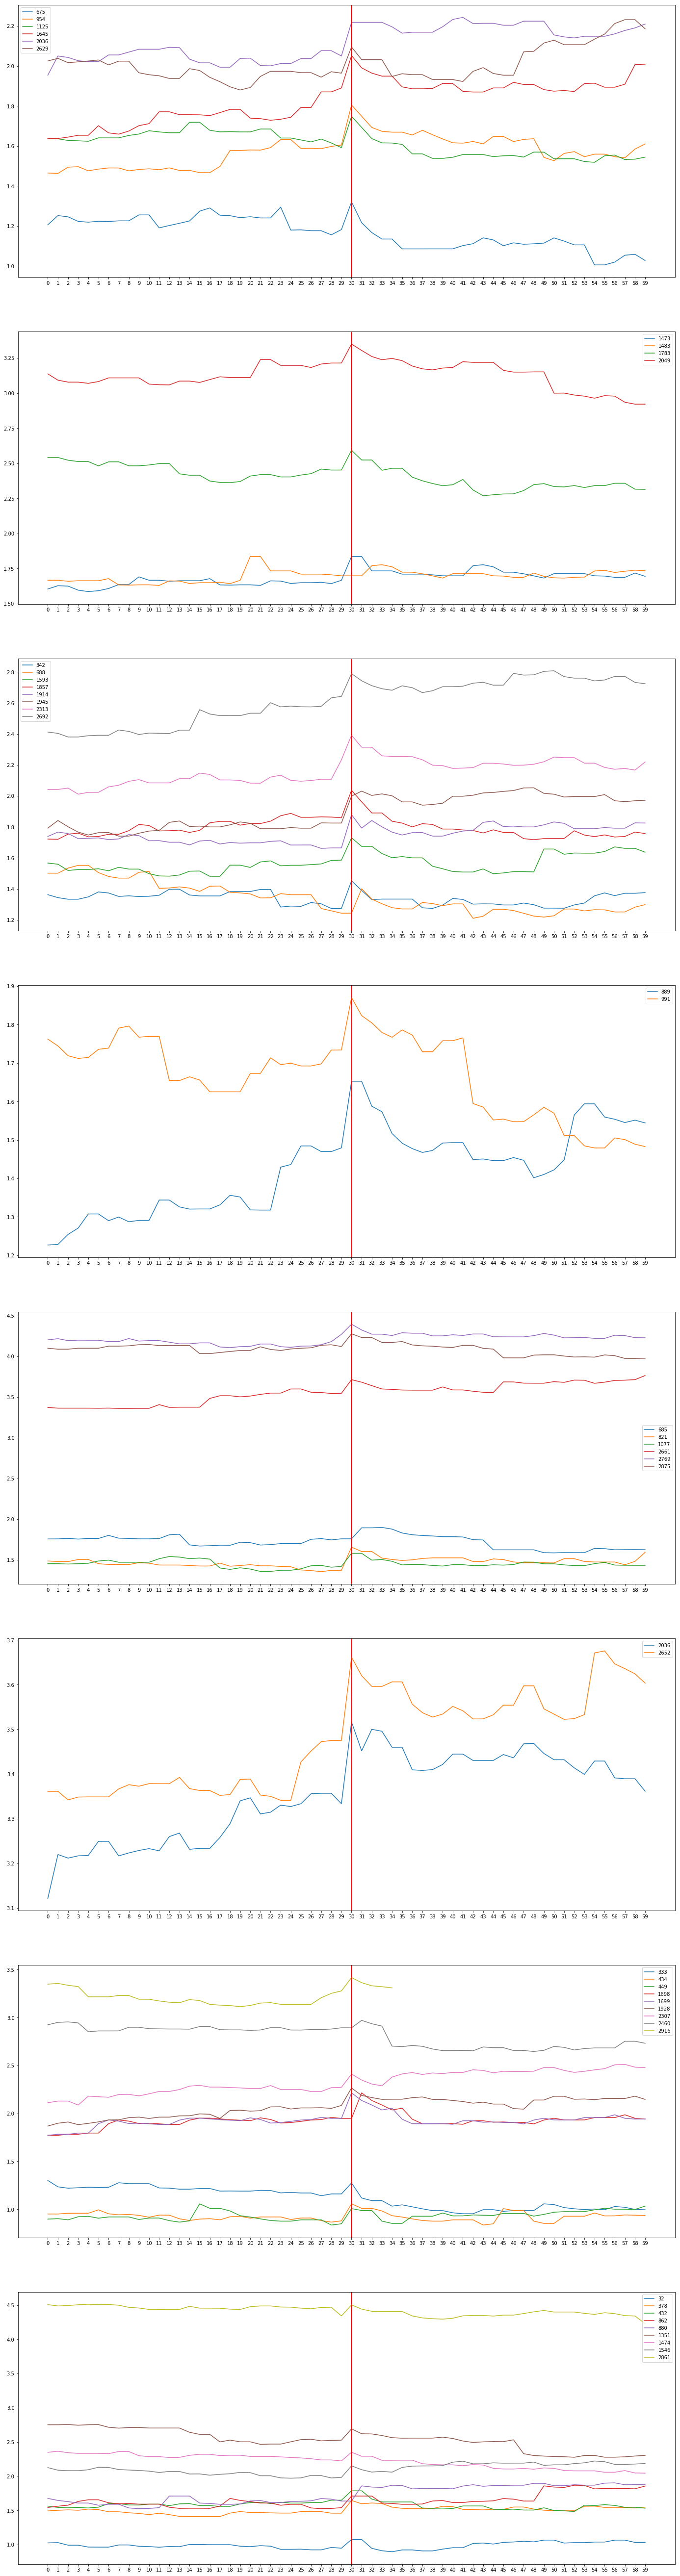

In [25]:
# plt.subplot(2, 1, 1)
plt.figure(figsize = (24, 96))
for i in range(8):
    plt.subplot(8, 1, i + 1)
    for ad in adlist[i]:
        plt.plot(sales['market_' + str(i + 1)][ad - 30:ad + 30].values, label=str(ad))
        plt.xticks(np.arange(0, 60))
        plt.axvline(x=30, c='r')
    plt.legend()

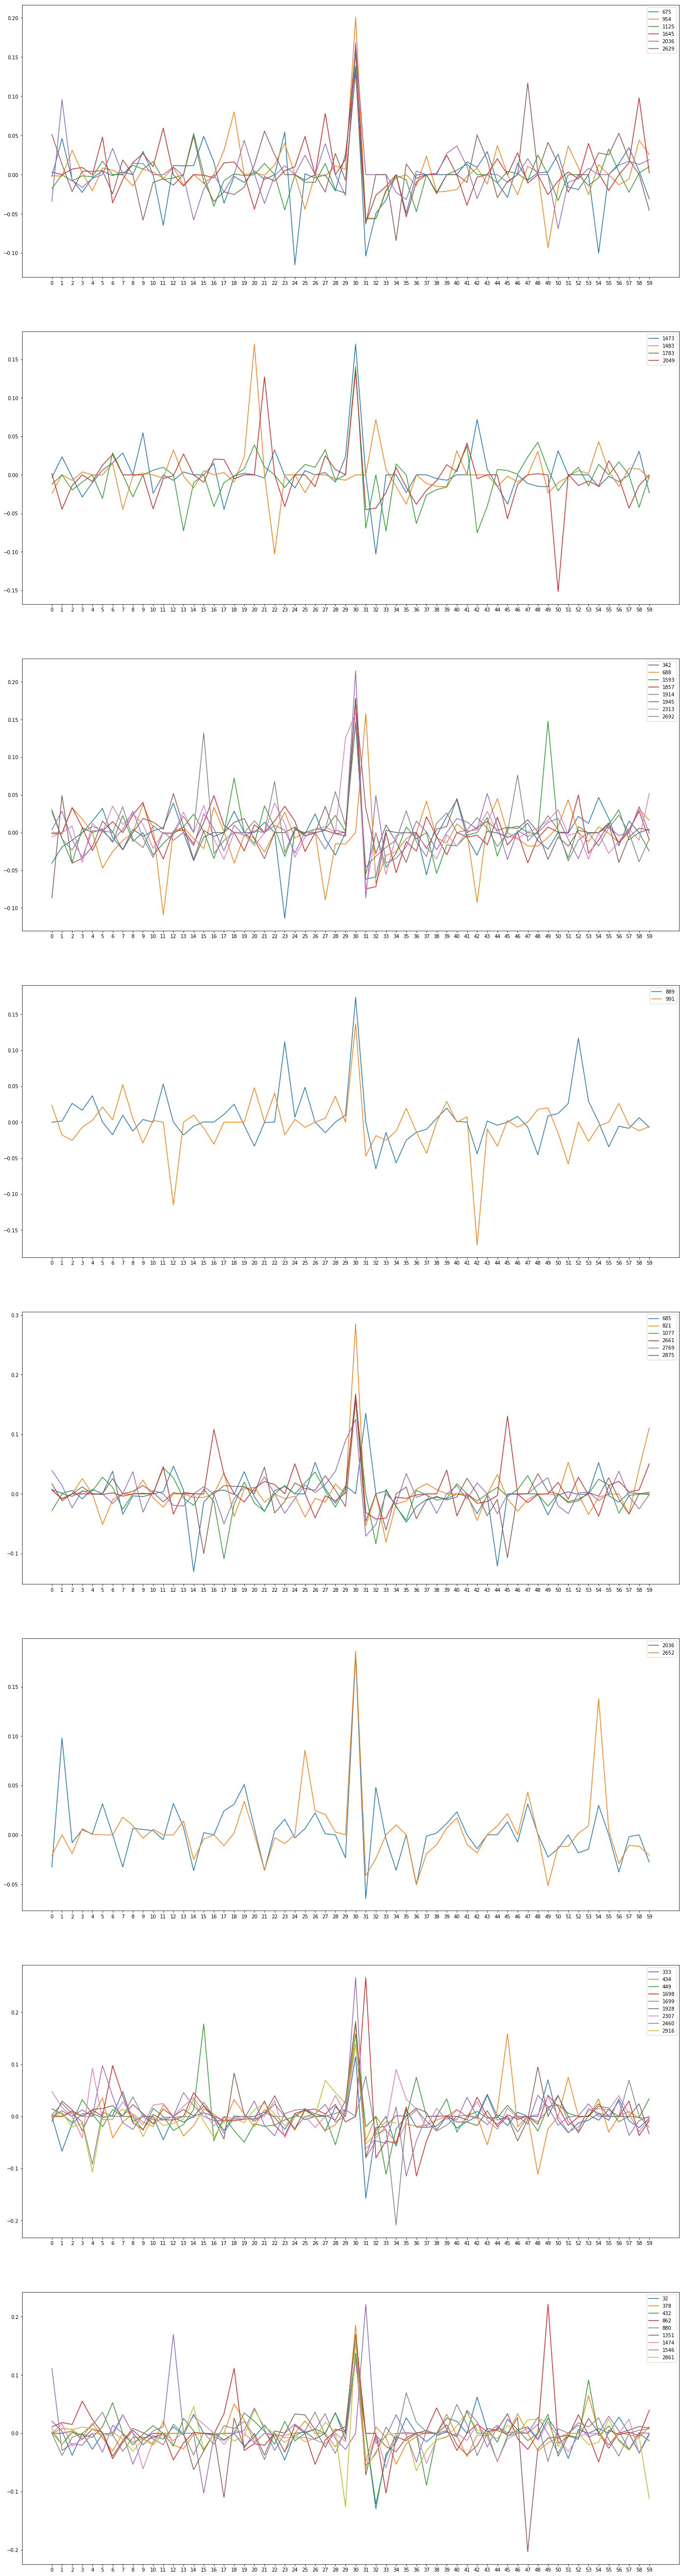

In [26]:
# plt.subplot(2, 1, 1)
plt.figure(figsize = (24, 96))
for i in range(8):
    plt.subplot(8, 1, i + 1)
    for ad in adlist[i]:
        plt.plot(sales['market_' + str(i + 1)].diff()[ad - 30:ad + 30].values, label=str(ad))
        plt.xticks(np.arange(0, 60))
    plt.legend()

------------------------------------------------------------------------------------------
Есть предположение, что реклама имеет долгосрочное влияние. 


------------------------------------------------------------------------------------------

In [27]:
strangedays = [1483, 688, 685, 1698, 880]

In [28]:
increases = list()
i = 0
for ads in adlist:
    summer = 0
    for ad in ads:
        if ad in strangedays:
            summer += sales['market_' + str(i + 1)].diff()[ad + 1]
        else:
            summer += sales['market_' + str(i + 1)].diff()[ad]
    summer /= len(ads)
    i += 1
    increases.append(summer)

In [29]:
increases

[0.15947060558777845,
 0.11148858592434763,
 0.1689141593474663,
 0.15503980593921995,
 0.17179785725039987,
 0.18470690838206938,
 0.16042007825194135,
 0.16278162792439813]

In [30]:
# decreases = list()
# i = 0
# for ads in adlist:
#     summer = 0
#     for ad in ads:
#         if ad in strangedays:
#             summer += sales['market_' + str(i + 1)].diff()[ad + 2]
#         else:
#             summer += sales['market_' + str(i + 1)].diff()[ad + 1]
#     summer /= len(ads)
#     i += 1
#     decreases.append(summer)
# print(decreases)

------------------------------------------------------------------------------------------
Это довольно серьезные изменения, так как например для market_1 и market_2:

In [31]:
sales['market_1'].diff()[sales['market_1'].diff() > 0].describe()

count    1171.000000
mean        0.020271
std         0.023512
min         0.000014
25%         0.005312
50%         0.012856
75%         0.027775
max         0.200639
Name: market_1, dtype: float64

In [32]:
sales['market_2'].diff()[sales['market_2'].diff() > 0].describe()

count    1197.000000
mean        0.020152
std         0.022814
min         0.000019
25%         0.005551
50%         0.012821
75%         0.027960
max         0.169975
Name: market_2, dtype: float64

То есть верхний квартиль(75%) положительных изменений продаж составляет  ~ 0.028

------------------------------------------------------------------------------------------

##### Гипотеза насчет дней, в которых продажи увеличиваются с лагом: это особые дни недели

In [33]:
from dateutil import parser
dts = list()
for stday in strangedays:
    dts.append(parser.parse(sales.loc[stday]['date']))

In [34]:
for dt in dts:
    print(dt.weekday())

1
4
1
6
0


##### Гипотеза не подтвердилась

##### наивная стратегия такая - предсказываем time series без учета рекламы, и в дни рекламы прибавляем средние значения увеличений по товарам(increases)

### 4. Анализ временного ряда sales

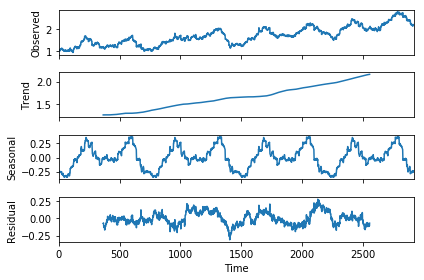

In [35]:
series = sales['market_1'].values
result = seasonal_decompose(series, model='additive', freq=730)
result.plot()
plt.show()

In [36]:
# sales['market_1'].values
observed = result.observed
resid = result.resid
seasonal = result.seasonal
trend = result.trend

In [37]:
# -183 to 183
(observed == (resid + seasonal + trend)).sum()

2191

In [38]:
observed_without_season = observed - seasonal

No handles with labels found to put in legend.


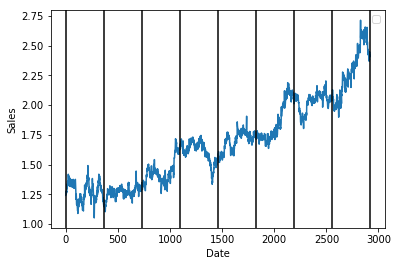

In [39]:
plt.plot(observed_without_season)
for i in range(9):
    plt.axvline(x=i * 365, c='k')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [40]:
NumberOfElements = len(observed_without_season)
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = observed_without_season[0:TrainingSize]
TestData = observed_without_season[TrainingSize:NumberOfElements]

##### я что-то пытался с ARIMA, но я так и не понял смысла параметров order

In [41]:
# from statsmodels.tsa.arima_model import ARIMA
# from pandas import DataFrame
# model = ARIMA(TrainingData, order=(4, 2, 1))
# model_fit = model.fit(disp=0)
# print(model_fit.summary())
# # plot residual errors
# residuals = DataFrame(model_fit.resid)
# residuals.plot()
# plt.show()
# residuals.plot(kind='kde')
# plt.show()
# print(residuals.describe())

# TestSize = -TrainingSize + NumberOfElements
# output = model_fit.forecast(steps = TestSize)[0]
# plt.plot(output, label='Predicted')
# plt.plot(TestData, label='Test')
# plt.legend()
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.show()

##### D-Fuller test

In [42]:
from statsmodels.tsa.stattools import adfuller

In [43]:
result = adfuller(observed_without_season, regression='ct')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.587767
p-value: 0.030896
Critical Values:
	1%: -3.962
	5%: -3.412
	10%: -3.128


##### Как видим, p-value < 5%, следовательно ряд observed_without_season с учетом тренда стационарный, теперь найдем тренд:

In [44]:
from sklearn.linear_model import LinearRegression

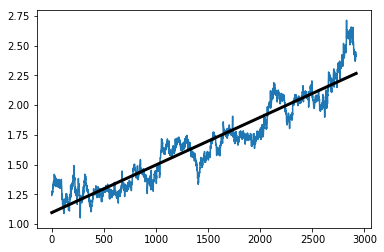

In [45]:
clf = LinearRegression()
clf.fit(np.arange(len(observed_without_season)).reshape(-1,1), observed_without_season)
predicted = clf.predict(np.arange(len(observed_without_season)).reshape(-1,1))
plt.plot(observed_without_season)
plt.plot(np.arange(len(observed_without_season)).reshape(-1,1), predicted, color='black', linewidth=3)

In [46]:
clf.coef_

array([0.00040061])

### 5. Итоги

In [47]:
example.head()

,date,market_1,market_2,market_3,market_4,market_5,market_6,market_7,market_8
0,2016-01-01,1,1,1,1,1,1,1,1
1,2016-01-02,1,1,1,1,1,1,1,1
2,2016-01-03,1,1,1,1,1,1,1,1
3,2016-01-04,1,1,1,1,1,1,1,1
4,2016-01-05,1,1,1,1,1,1,1,1


In [48]:
adverts_test.head()

,date,market_1,market_2,market_3,market_4,market_5,market_6,market_7,market_8
0,2016-01-01,0,0,0,0,0,0,0,0
1,2016-01-02,0,0,0,0,0,0,0,0
2,2016-01-03,0,0,0,0,0,0,0,0
3,2016-01-04,0,0,0,0,0,0,0,0
4,2016-01-05,0,0,0,0,0,0,0,0


In [49]:
my_pred = clf.predict(np.arange(2921, 3650).reshape(-1, 1)) + np.array(seasonal[:729])

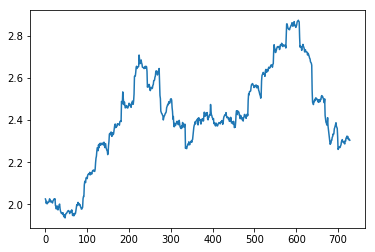

In [50]:
plt.plot(my_pred)

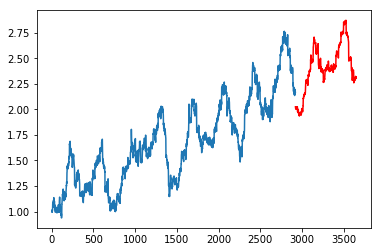

In [51]:
general = np.concatenate((np.array(observed), my_pred))

plt.plot(observed)
plt.plot(np.arange(len(observed), len(observed) + len(my_pred)).reshape(-1,1), my_pred, color='red')

##### подкорректируем

In [52]:
my_pred += (observed[-1] - my_pred[0]) * np.ones(len(my_pred))

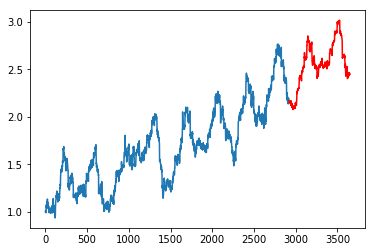

In [53]:
plt.plot(observed)
plt.plot(np.arange(len(observed), len(observed) + len(my_pred)).reshape(-1,1), my_pred, color='red')

In [54]:
example.head()

,date,market_1,market_2,market_3,market_4,market_5,market_6,market_7,market_8
0,2016-01-01,1,1,1,1,1,1,1,1
1,2016-01-02,1,1,1,1,1,1,1,1
2,2016-01-03,1,1,1,1,1,1,1,1
3,2016-01-04,1,1,1,1,1,1,1,1
4,2016-01-05,1,1,1,1,1,1,1,1


##### теперь для всех продуктов

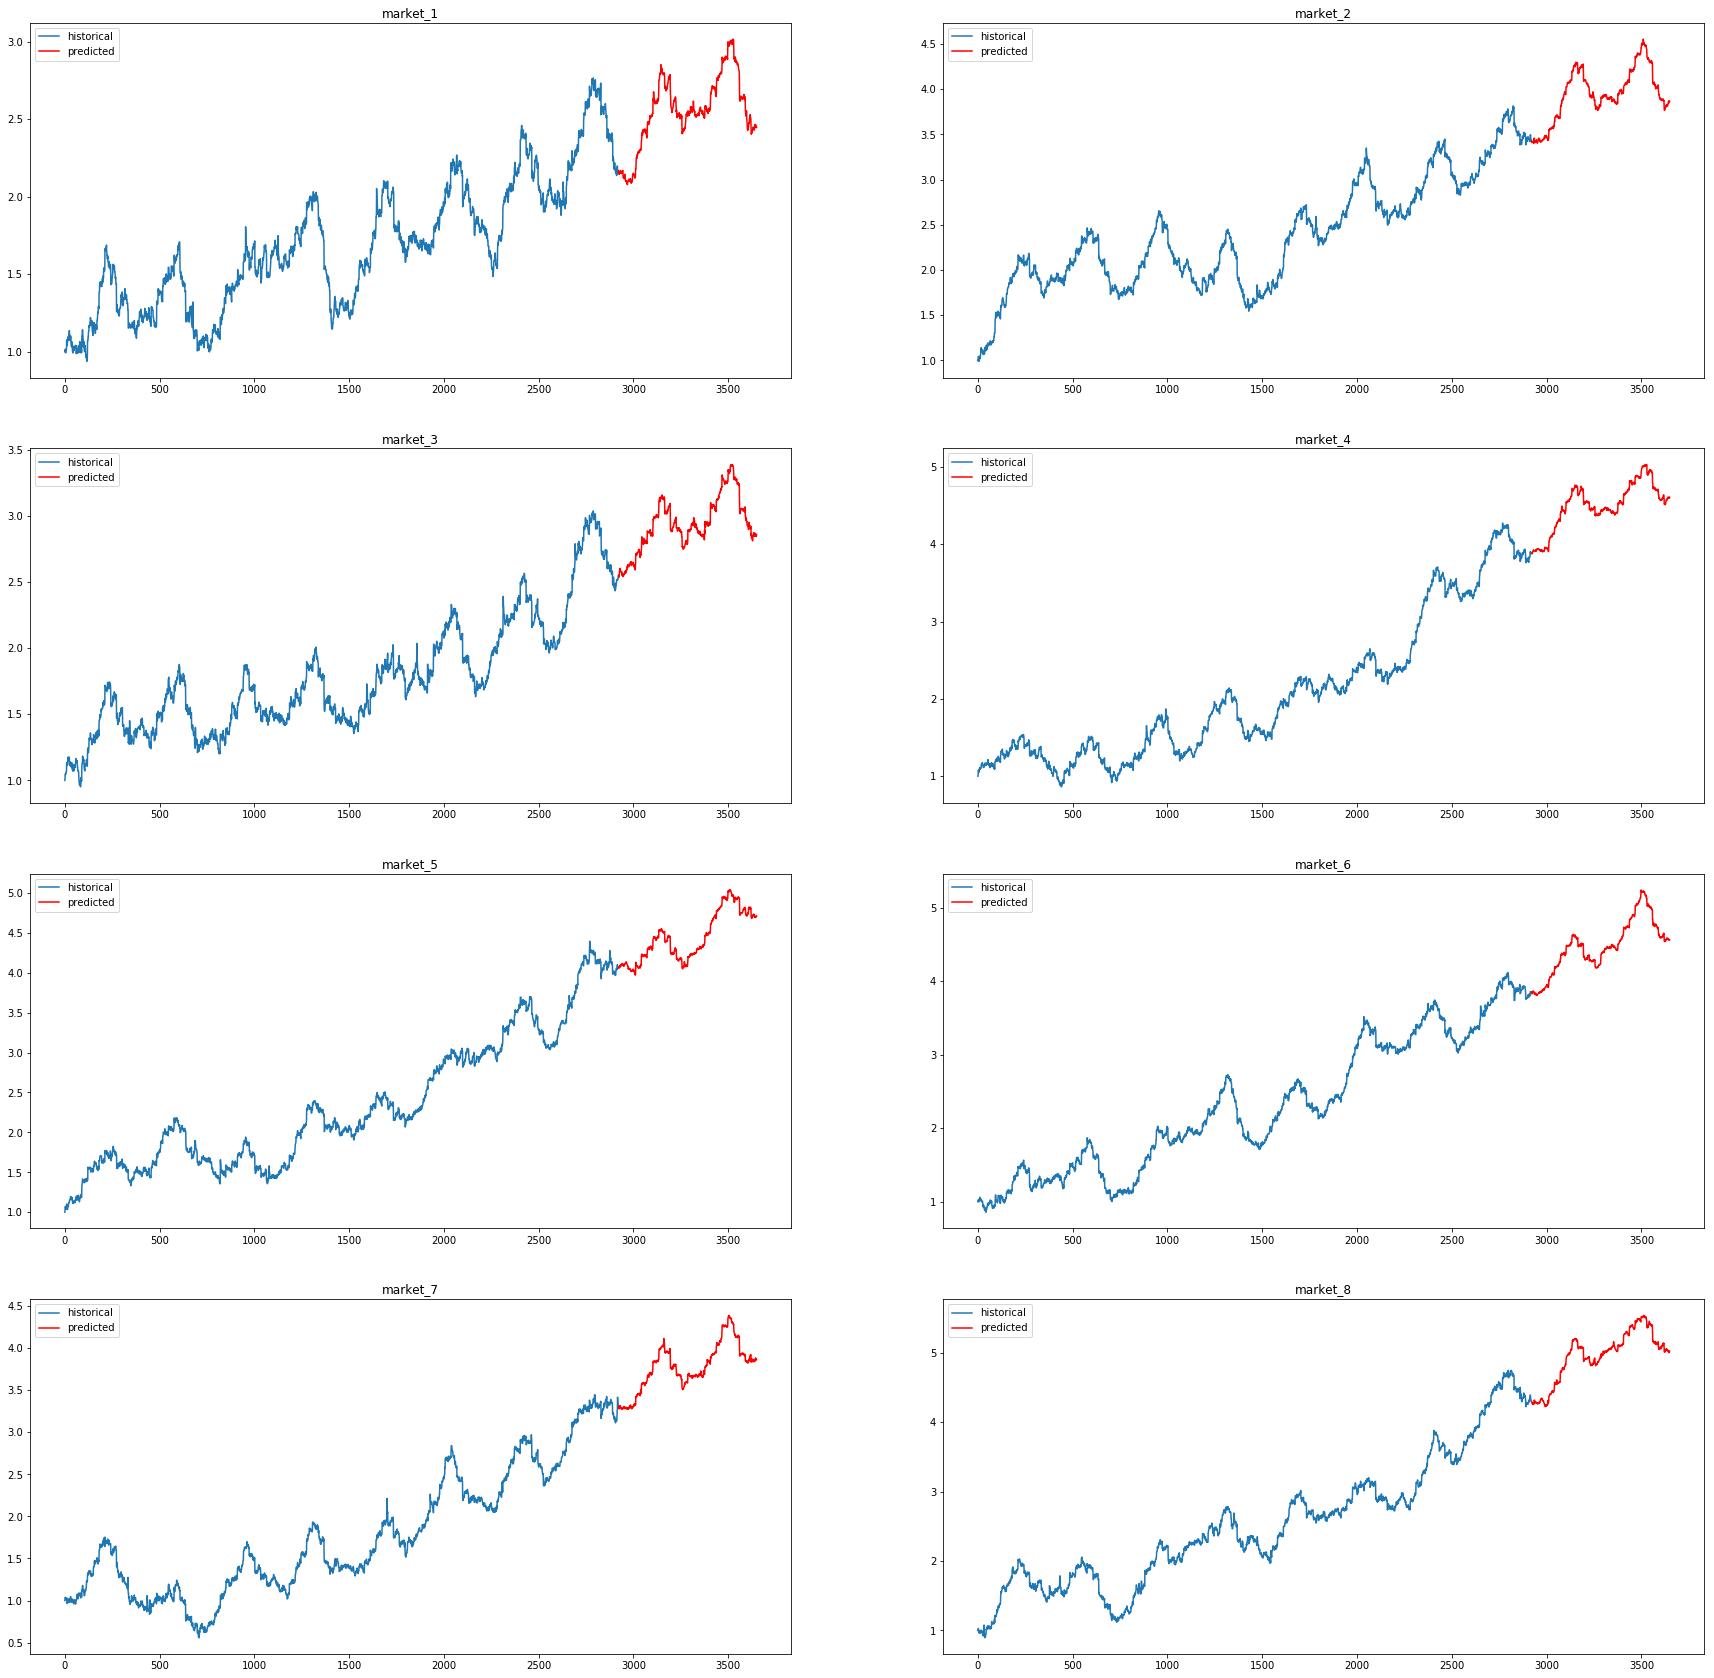

In [55]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(30, 30))
clfs = list()
for i in range(8):
    series = sales['market_' + str(i + 1)].values
    result = seasonal_decompose(series, model='additive', freq=730)
    observed = result.observed
    seasonal = result.seasonal
    observed_without_season = observed - seasonal
    clf = LinearRegression()
    clf.fit(np.arange(len(observed_without_season)).reshape(-1,1), observed_without_season)
    clfs.append(clf.coef_)
    my_pred = clf.predict(np.arange(2921, 3650).reshape(-1, 1)) + np.array(seasonal[:729])
    my_pred += (observed[-1] - my_pred[0]) * np.ones(len(my_pred))
    example['market_' + str(i + 1)] = my_pred
    axes[i // 2, i - 2 * (i // 2)].plot(observed, label='historical')
    axes[i // 2, i - 2 * (i // 2)].plot(np.arange(len(observed), len(observed) + len(my_pred)).reshape(-1,1), my_pred, color='red', label='predicted')
    axes[i // 2, i - 2 * (i // 2)].set_title('market_' + str(i + 1))
    axes[i // 2, i - 2 * (i // 2)].legend()

##### плюс реклама

In [56]:
increases

[0.15947060558777845,
 0.11148858592434763,
 0.1689141593474663,
 0.15503980593921995,
 0.17179785725039987,
 0.18470690838206938,
 0.16042007825194135,
 0.16278162792439813]

In [57]:
adverts_test.head()

,date,market_1,market_2,market_3,market_4,market_5,market_6,market_7,market_8
0,2016-01-01,0,0,0,0,0,0,0,0
1,2016-01-02,0,0,0,0,0,0,0,0
2,2016-01-03,0,0,0,0,0,0,0,0
3,2016-01-04,0,0,0,0,0,0,0,0
4,2016-01-05,0,0,0,0,0,0,0,0


In [58]:
for i in range(8):
    for j in list(adverts_test[adverts_test['market_' + str(i + 1)] != 0].index):
        example['market_' + str(i + 1)].iloc[j] = example['market_' + str(i + 1)].iloc[j] + increases[i]

C:\Users\777\Anaconda3\envs\tf_gpu\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


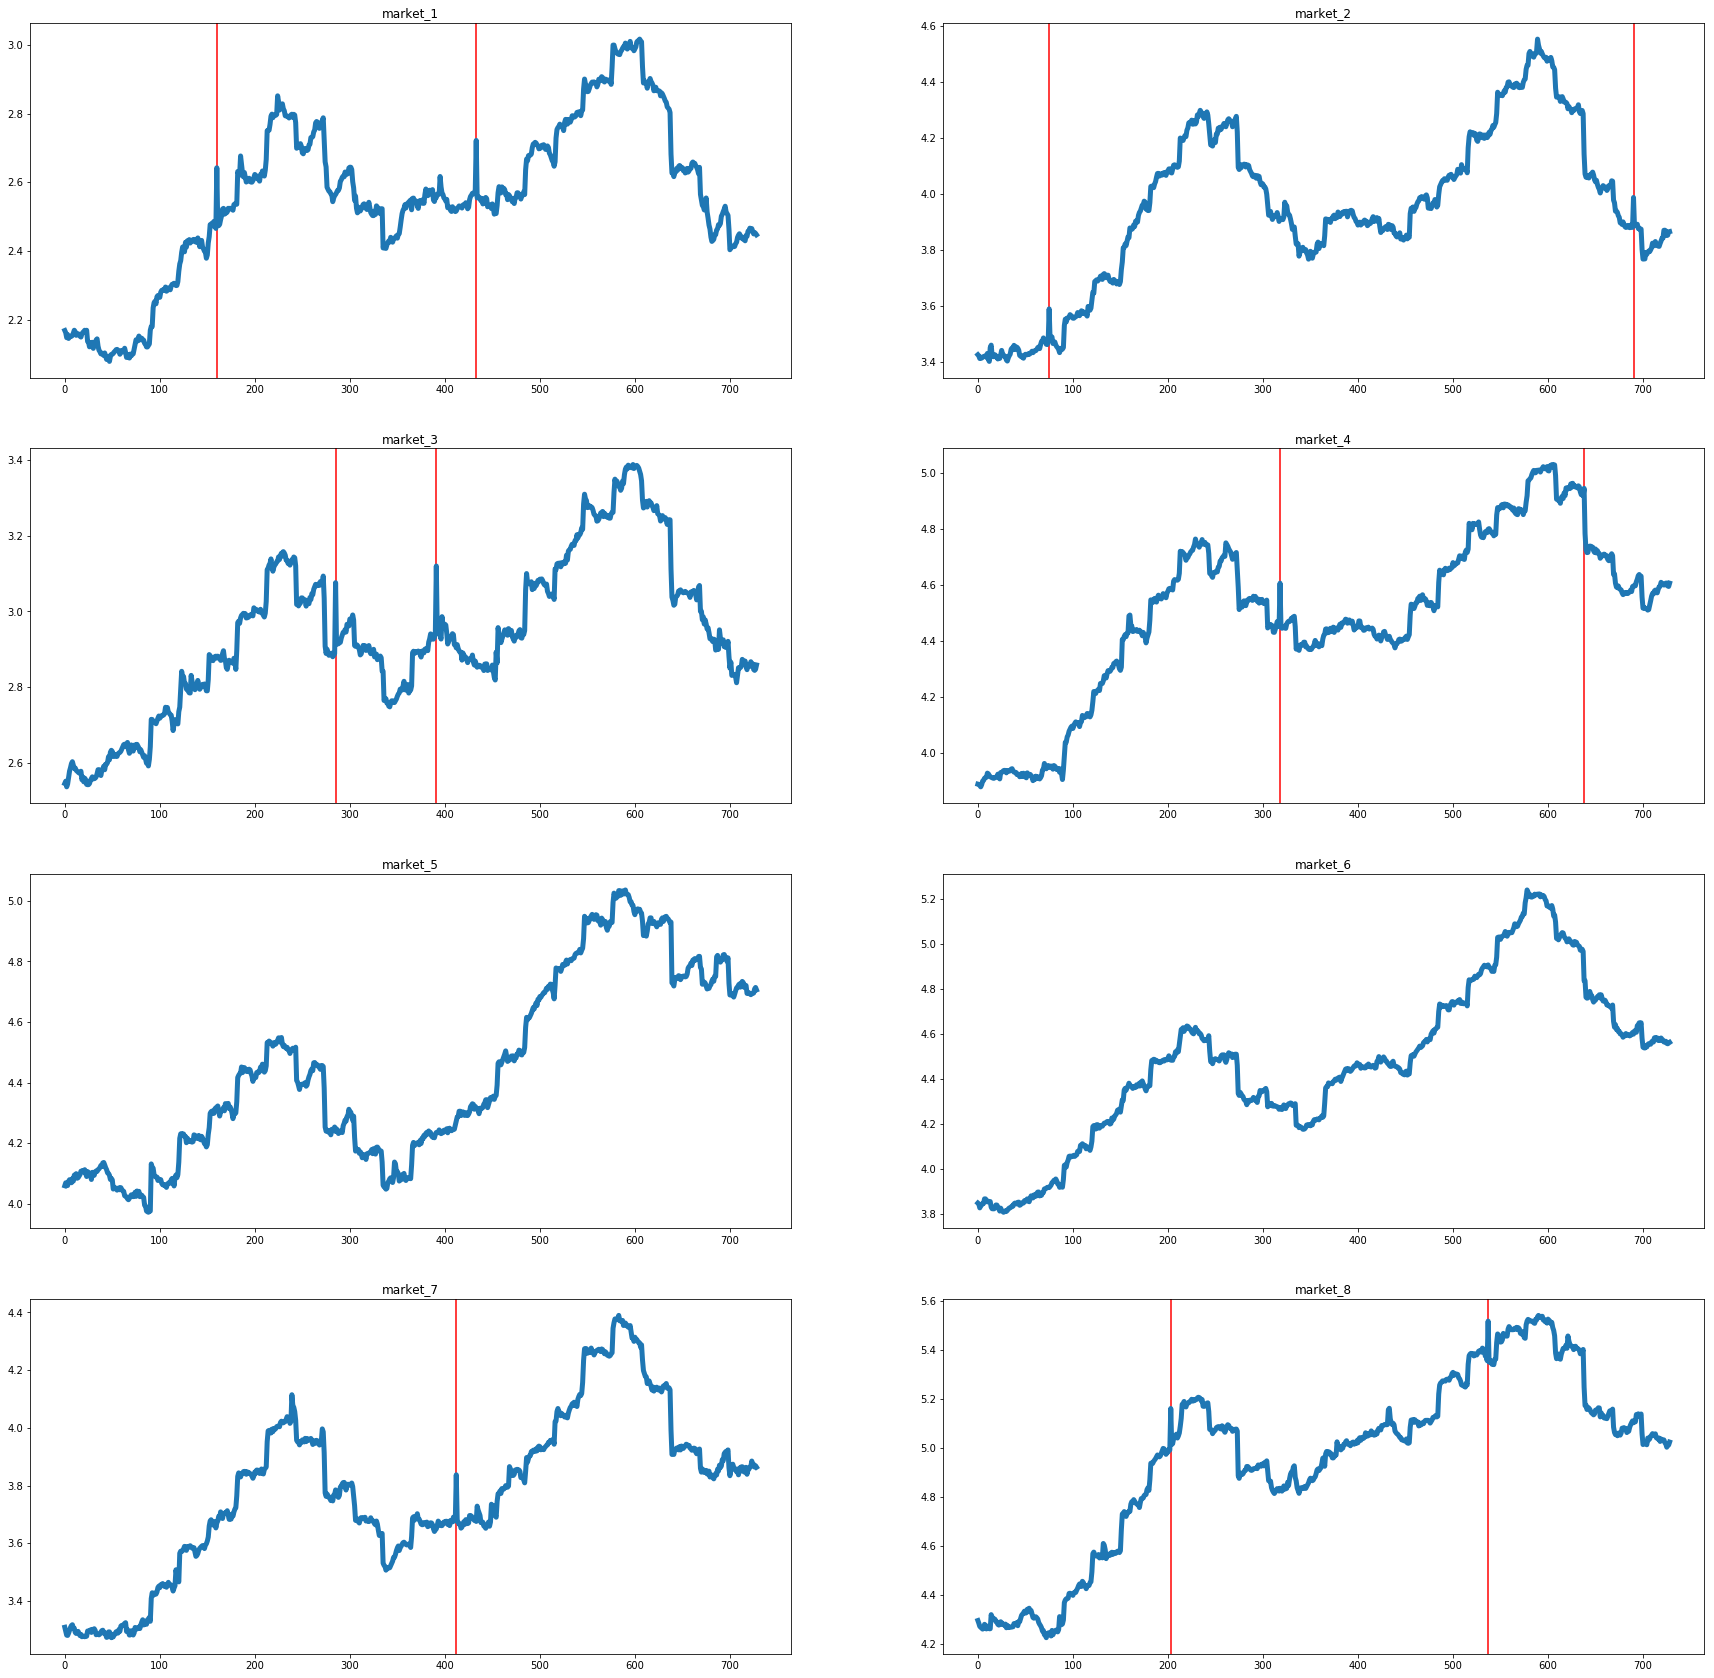

In [59]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(30, 30))
for i in range(8):
    adlist = list(adverts_test[adverts_test['market_' + str(i + 1)] != 0].index)
    for ad in adlist:
        axes[i // 2, i - 2 * (i // 2)].axvline(x=ad, c='r')
    axes[i // 2, i - 2 * (i // 2)].plot(example['market_' + str(i + 1)], linewidth=5)
    axes[i // 2, i - 2 * (i // 2)].set_title('market_' + str(i + 1))

In [60]:
example.to_csv('result.csv', index=False)

##### и все-таки про рекламу и тренды

In [62]:
adlist = [list(adverts[adverts['market_' + str(i)] != 0].index) for i in range(1, 9)]

In [65]:
difs = list()
for i in range(8):
    avg = 0
    print("MARKET_" + str(i + 1))
    for ad in adlist[i]:
#         print("BEFORE AD: ", sales['market_' + str(i + 1)][ad - 40:ad + 40].values.mean())
#         print("AFTER AD: ", sales['market_' + str(i + 1)][ad:ad + 40].values.mean())
        pre = sales['market_' + str(i + 1)][ad - 100:ad].values.mean() + 100 * clfs[i]
        after = sales['market_' + str(i + 1)][ad:ad + 100].values.mean()
        if (pre < after):
            print("AD HAS LONG-LASTING EFFECTS")
            
            print("AVG DIF FOR 100 DAYS: ", (after - pre))
        else:
            print("AD DIDNT HAVE LONG-LASTING EFFECTS")
        avg += (after - pre)
    avg /= len(adlist[i])
    difs.append(avg)
        
    print("--------------------------------------")

MARKET_1
AD DIDNT HAVE LONG-LASTING EFFECTS
AD HAS LONG-LASTING EFFECTS
AVG DIF FOR 100 DAYS:  [0.09863425]
AD DIDNT HAVE LONG-LASTING EFFECTS
AD HAS LONG-LASTING EFFECTS
AVG DIF FOR 100 DAYS:  [0.33401038]
AD HAS LONG-LASTING EFFECTS
AVG DIF FOR 100 DAYS:  [0.18954528]
AD HAS LONG-LASTING EFFECTS
AVG DIF FOR 100 DAYS:  [0.18873417]
--------------------------------------
MARKET_2
AD HAS LONG-LASTING EFFECTS
AVG DIF FOR 100 DAYS:  [0.02658443]
AD HAS LONG-LASTING EFFECTS
AVG DIF FOR 100 DAYS:  [0.0517422]
AD DIDNT HAVE LONG-LASTING EFFECTS
AD DIDNT HAVE LONG-LASTING EFFECTS
--------------------------------------
MARKET_3
AD DIDNT HAVE LONG-LASTING EFFECTS
AD DIDNT HAVE LONG-LASTING EFFECTS
AD HAS LONG-LASTING EFFECTS
AVG DIF FOR 100 DAYS:  [0.21308328]
AD DIDNT HAVE LONG-LASTING EFFECTS
AD HAS LONG-LASTING EFFECTS
AVG DIF FOR 100 DAYS:  [0.1661493]
AD HAS LONG-LASTING EFFECTS
AVG DIF FOR 100 DAYS:  [0.27770868]
AD HAS LONG-LASTING EFFECTS
AVG DIF FOR 100 DAYS:  [0.30032658]
AD HAS LONG-

C:\Users\777\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice.
  
C:\Users\777\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


In [66]:
difs

[array([0.06703564]),
 array([-0.08008472]),
 array([0.11957456]),
 array([-0.01793222]),
 array([-0.01659619]),
 array([0.25279168]),
 array([-0.00775822]),
 array([nan])]